<a href="https://colab.research.google.com/github/sulbhagarg/Deep-Learning/blob/master/DL_Practical_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models

In [ ]:
!ls

gdrive	sample_data


**DATASET**

In [ ]:
without_mask = []
root = '/content/gdrive/My Drive/Sem 7/Deep Learning/Face-Mask-Detection/without_mask'
for sample in os.listdir(root):
  # print(sample)
  image = root + '/' + sample
  without_mask.append(image)

In [ ]:
with_mask = []
root = '/content/gdrive/My Drive/Sem 7/Deep Learning/Face-Mask-Detection/with_mask'
for sample in os.listdir(root):
  # print(sample)
  image = root + '/' + sample
  with_mask.append(image)

In [ ]:
print(len(without_mask))
print(len(with_mask))

100
100


**DATASET LABELING, MASK: 0, WITHOUT_MASK: 1**

In [ ]:
data = []
for i in range(len(without_mask)):
  x = without_mask[i]
  y = 0
  data.append([x, y])
for i in range(len(with_mask)):
  x = with_mask[i]
  y = 1
  data.append([x, y])
data = np.array(data)
print(data.shape)

(200, 2)


In [ ]:
random.shuffle(data)

**DATA SEPARATION INTO TRAIN & TEST**

In [ ]:
seperation = int(data.shape[0]*0.8)
train_data = data[: seperation]
test_data = data[seperation :]
print(train_data.shape)
print(test_data.shape)

(160, 2)
(40, 2)


In [ ]:
def data_gen(X, batch_size = 8):
  while True:
    images = []
    labels = []
    idx = np.random.choice(np.arange(X.shape[0]), batch_size, replace=False)

    for i in idx:
      label = X[i][1]
      img_path = X[i][0]
      img = cv2.imread(img_path)
      img = cv2.resize(img, (224, 224))/255
      img = np.array(img)
      images.append(img)
      labels.append(int(label))
    
    images = np.array(images)
    labels = np.array(labels)
    yield images, labels

In [ ]:
class Classifier(tf.keras.Model):
  def __init__(self, Batch_Size=1, Image_Shape=((224, 224, 3))):
    super(Classifier, self).__init__()

    self.conv1 = tf.keras.layers.Conv2D(16, (3,3), (2,2), activation='relu')
    # self.conv2 = tf.keras.layers.Conv2D(16, (3,3), (2,2), activation='relu')
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(1024, activation='relu')
    self.dense2 = tf.keras.layers.Dense(2, activation='softmax')

  def call(self, sample):

    x = self.conv1(sample)
    # x = self.conv2(sample)
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)

    return x

In [ ]:
Batch_Size = 8
Image_Shape = (224, 224, 3)

In [ ]:
model = Classifier(Batch_Size, Image_Shape)
model.build(input_shape=(None,  Image_Shape[0], Image_Shape[1], Image_Shape[2]))
model.summary()

Model: "classifier_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            multiple                  448       
_________________________________________________________________
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_6 (Dense)              multiple                  201868288 
_________________________________________________________________
dense_7 (Dense)              multiple                  2050      
Total params: 201,870,786
Trainable params: 201,870,786
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = Adam(lr = 0.0001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(
    data_gen(train_data),
    epochs = 15,
    steps_per_epoch = 10,
    validation_data = data_gen(test_data),
    validation_steps = 3
)

Epoch 1/15
10/10 [==============================] - 15s 1s/step - loss: 0.7338 - accuracy: 0.9125 - val_loss: 5.0065 - val_accuracy: 0.6667
Epoch 2/15
10/10 [==============================] - 15s 1s/step - loss: 0.1433 - accuracy: 0.9875 - val_loss: 1.8794 - val_accuracy: 0.7500
Epoch 3/15
10/10 [==============================] - 14s 1s/step - loss: 0.1655 - accuracy: 0.9625 - val_loss: 6.1521 - val_accuracy: 0.7500
Epoch 4/15
10/10 [==============================] - 15s 1s/step - loss: 0.4006 - accuracy: 0.9250 - val_loss: 1.6685 - val_accuracy: 0.8333
Epoch 5/15
10/10 [==============================] - 15s 1s/step - loss: 0.1373 - accuracy: 0.9750 - val_loss: 8.2490 - val_accuracy: 0.5417
Epoch 6/15
10/10 [==============================] - 14s 1s/step - loss: 0.0200 - accuracy: 0.9875 - val_loss: 0.7866 - val_accuracy: 0.8333
Epoch 7/15
10/10 [==============================] - 15s 1s/step - loss: 0.0463 - accuracy: 0.9875 - val_loss: 3.5753 - val_accuracy: 0.6250
Epoch 8/15
10/10 [==

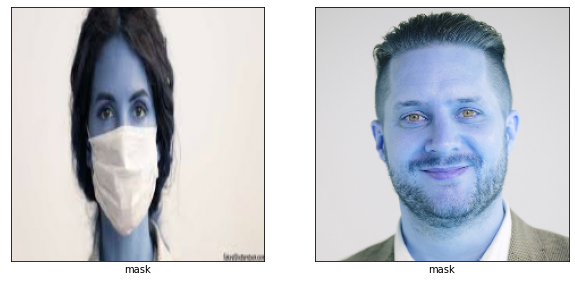

In [ ]:
testing = []
root = '/content/gdrive/My Drive/Sem 7/Deep Learning/Face-Mask-Detection/testing'
plt.figure(figsize=(10,10))
i=1
for sample in os.listdir(root):
  image = root + '/' + sample
  testing.append(image)
  # print(image)
  img = cv2.imread(image)
  img = cv2.resize(img, (224, 224))/255
  plt.subplot(1,2,i)
  i=i+1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  img = img.reshape(1, 224, 224, 3)
  pred = model.predict(img, 1)
  if pred.argmax()==0:
    plt.xlabel('mask')
  else:
    plt.xlabel('without_mask')
plt.show()